In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import torch

from sbi import analysis as analysis
from sbi import utils as utils
from sbi.inference import NPE, simulate_for_sbi
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

In [2]:
num_dim = 3
prior = utils.BoxUniform(low=-2 * torch.ones(num_dim), high=2 * torch.ones(num_dim))

def simulator(theta):
    # linear gaussian
    return theta + 1.0 + torch.randn_like(theta) * 0.1

# Check prior, simulator, consistency
prior, num_parameters, prior_returns_numpy = process_prior(prior)
simulator = process_simulator(simulator, prior, prior_returns_numpy)
check_sbi_inputs(simulator, prior)

In [66]:
# generate simulations and pass to the inference object

# random index permutation torch
idx = torch.randperm(2000)

inference_2 = NPE(prior=prior)
inference_2 = inference_2.append_simulations(theta[idx], x[idx])

# train the density estimator and build the posterior
density_estimator_2 = inference_2.train()

tensor([0.0146, 0.0140, 0.0192])
END OF MODEL
tensor([ 0.0312,  0.0059, -0.0135])


In [71]:
for name, param in inference._neural_net.named_parameters():
    print(inference._neural_net.state_dict()[name] - inference_2._neural_net.state_dict()[name])

tensor([[ 3.0845e-05,  0.0000e+00,  0.0000e+00],
        [ 1.6212e-04, -7.8082e-06,  0.0000e+00],
        [-3.3277e-04,  0.0000e+00,  0.0000e+00],
        [-8.3148e-05, -2.1693e-04,  0.0000e+00],
        [ 2.4140e-05,  0.0000e+00,  0.0000e+00],
        [ 2.1541e-04,  8.1867e-05,  0.0000e+00],
        [-6.3501e-05,  0.0000e+00,  0.0000e+00],
        [ 1.2333e-03,  1.2878e-04,  0.0000e+00],
        [ 7.3500e-06,  0.0000e+00,  0.0000e+00],
        [-9.0003e-06, -1.4564e-04,  0.0000e+00],
        [ 2.1624e-04,  0.0000e+00,  0.0000e+00],
        [-8.1763e-05, -9.2480e-04,  0.0000e+00],
        [-4.2835e-04,  0.0000e+00,  0.0000e+00],
        [-1.5837e-04, -9.6560e-05,  0.0000e+00],
        [-3.3051e-04,  0.0000e+00,  0.0000e+00],
        [ 5.4660e-04, -8.9705e-05,  0.0000e+00],
        [ 2.7552e-04,  0.0000e+00,  0.0000e+00],
        [ 1.3784e-05,  7.2517e-05,  0.0000e+00],
        [ 7.8976e-05,  0.0000e+00,  0.0000e+00],
        [ 2.0030e-04, -3.2272e-04,  0.0000e+00],
        [ 1.6329e-04

In [5]:
# generate the first observation
theta_1 = prior.sample((1,))
x_obs_1 = simulator(theta_1)
# now generate a second observation
theta_2 = prior.sample((1,))
x_obs_2 = simulator(theta_2)

In [97]:
x_obs_1.shape

torch.Size([1, 3])

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

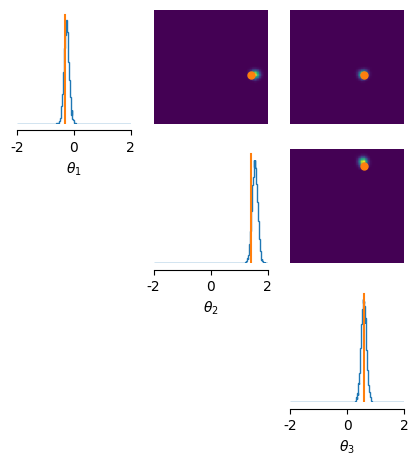

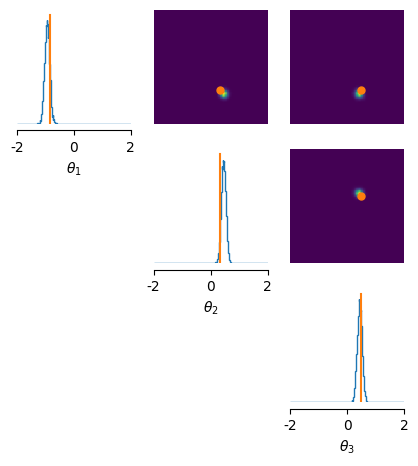

In [6]:
posterior_samples_1 = posterior.sample((10000,), x=x_obs_1)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples_1, limits=[[-2, 2], [-2, 2], [-2, 2]], figsize=(5, 5),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    points=theta_1 # add ground truth thetas
)


posterior_samples_2 = posterior.sample((10000,), x=x_obs_2)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples_2, limits=[[-2, 2], [-2, 2], [-2, 2]], figsize=(5, 5),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    points=theta_2 # add ground truth thetas
)

In [35]:
import numpy as np
dot_products = []
for name, param in inference._neural_net.named_parameters():
    run_1_grad = np.loadtxt(f"Run 1/param_{name}.txt")
    run_2_grad = np.loadtxt(f"Run 2/param_{name}.txt")
    dot_products.append(np.sum(run_1_grad * run_2_grad) / np.sqrt(np.sum(run_1_grad**2) * np.sum(run_2_grad**2)))


net._transform._transforms.1.autoregressive_net.initial_layer.weight
net._transform._transforms.1.autoregressive_net.initial_layer.bias
net._transform._transforms.1.autoregressive_net.context_layer.weight
net._transform._transforms.1.autoregressive_net.context_layer.bias
net._transform._transforms.1.autoregressive_net.blocks.0.linear.weight
net._transform._transforms.1.autoregressive_net.blocks.0.linear.bias
net._transform._transforms.1.autoregressive_net.blocks.1.linear.weight
net._transform._transforms.1.autoregressive_net.blocks.1.linear.bias
net._transform._transforms.1.autoregressive_net.final_layer.weight
net._transform._transforms.1.autoregressive_net.final_layer.bias
net._transform._transforms.3.autoregressive_net.initial_layer.weight
net._transform._transforms.3.autoregressive_net.initial_layer.bias
net._transform._transforms.3.autoregressive_net.context_layer.weight
net._transform._transforms.3.autoregressive_net.context_layer.bias
net._transform._transforms.3.autoregressive_

In [78]:
# Create inference object. Here, NPE is used.
inference = NPE(prior=prior)

# generate simulations and pass to the inference object
theta, x = simulate_for_sbi(simulator, proposal=prior, num_simulations=2000)
inference = inference.append_simulations(theta, x)

# train the density estimator and build the posterior
density_estimator = inference.train()
posterior = inference.build_posterior(density_estimator)

  0%|          | 0/2000 [00:00<?, ?it/s]

tensor([ 0.0305, -0.0318,  0.0051])
END OF MODEL
tensor([ 0.0312,  0.0059, -0.0135])
 Neural network successfully converged after 92 epochs.

In [92]:
theta_1 = prior.sample((1,))
x_obs_1 = simulator(theta_1)
posterior_samples = posterior.sample((10000,), x=x_obs_1)
posterior_samples_2 = posterior.sample((10000,), x=x_obs_1)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

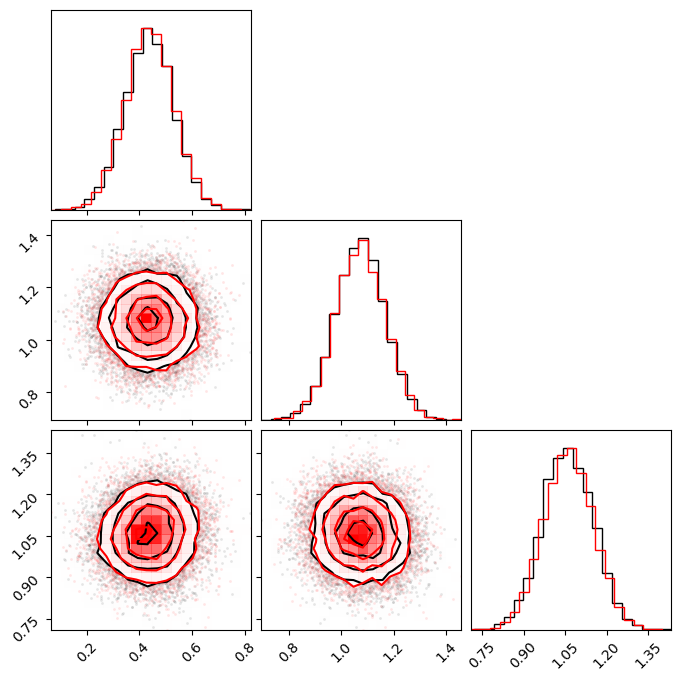

In [94]:
import corner
corner.corner(posterior_samples.numpy())
corner.corner(posterior_samples_2.numpy(), fig=plt.gcf(), color='red');

In [85]:
def get_R(samples):
    """
    Computes the Gelman-Rubin (GR) statistic for convergence assessment. The
    GR statistic is a convergence diagnostic used to assess whether multiple
    Markov chains have converged to the same distribution. Values close to 1
    indicate convergence. For details see
    https://en.wikipedia.org/wiki/Gelman-Rubin_statistic

    Parameters:
    -----------
    samples : numpy.ndarray
        Array containing MCMC samples with dimensions
        (N_steps, N_chains, N_parameters).

    Returns:
    --------
    R : numpy.ndarray
        Array containing the Gelman-Rubin statistics indicating convergence for
        the different parameters. Values close to 1 indicate convergence.

    """

    # Get the shapes
    N_steps, N_chains, N_parameters = samples.shape

    # Chain means
    chain_mean = np.mean(samples, axis=0)

    # Global mean
    global_mean = np.mean(chain_mean, axis=0)

    # Variance between the chain means
    variance_of_means = (
        N_steps
        / (N_chains - 1)
        * np.sum((chain_mean - global_mean[None, :]) ** 2, axis=0)
    )

    # Variance of the individual chain across all chains
    intra_chain_variance = np.std(samples, axis=0, ddof=1) ** 2

    # And its averaged value over the chains
    mean_intra_chain_variance = np.mean(intra_chain_variance, axis=0)

    # First term
    term_1 = (N_steps - 1) / N_steps

    # Second term
    term_2 = variance_of_means / mean_intra_chain_variance / N_steps

    # This is the R (as a vector running on the paramters)
    return term_1 + term_2

In [90]:
torch.stack([posterior_samples, posterior_samples]).transpose(0, 1).shape

torch.Size([10000, 2, 3])

In [95]:
get_R(torch.stack([posterior_samples, posterior_samples_2]).transpose(0, 1).numpy())

array([1.0001671, 0.9999126, 1.0003728], dtype=float32)

In [100]:
# Make a gif
import matplotlib.pyplot as plt
import numpy as np
import imageio

images = []
for epoch in range(50):
    images.append(imageio.imread(f"epoch_{epoch}.png"))



imageio.mimsave('posterior.gif', images, duration=0.5)

/var/folders/rr/6sbz4k1945v0s9xvs3ldc3ch0000gn/T/ipykernel_35214/3224696373.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"epoch_{epoch}.png"))
